In [76]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from mpl_finance import candlestick_ohlc
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator


%matplotlib inline


In [77]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2018,9,1)
end = datetime.datetime(2019,1,28)
stocks = 'BUMI.JK ANTM.JK WSKT.JK INKP.JK'
stocks = stocks.split()
data = web.DataReader(stocks, 'yahoo', start, end )

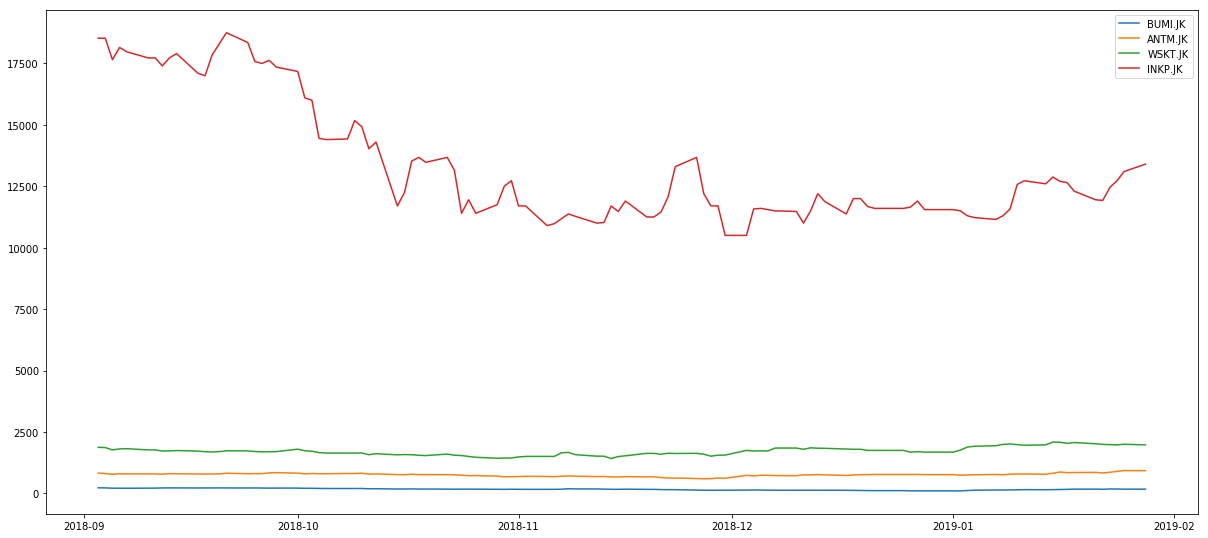

In [78]:
fig = plt.figure(figsize=(16,7))
ax = fig.add_axes([0,0,1,1])

for stock in stocks:
    ax.plot(data['Close', stock], label =stock)

ax.legend(loc = 0 )

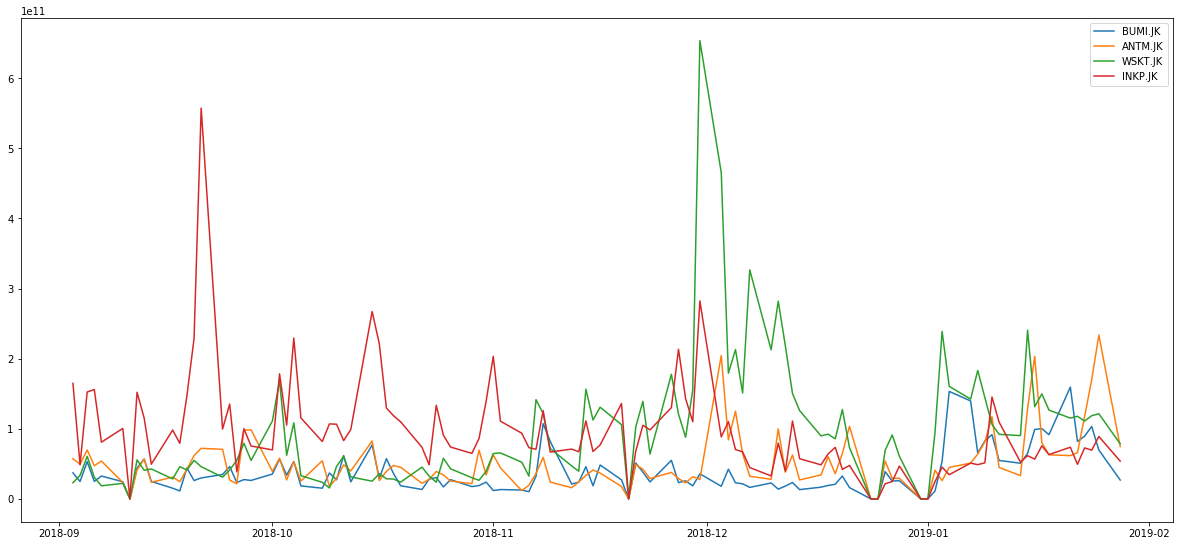

In [79]:
## transactions volume

volumesDF = pd.DataFrame()
fig = plt.figure(figsize=(16,7))
ax = fig.add_axes([0,0,1,1])

for stock in stocks:
    volumesDF[stock] = data['Open',stock] * data['Volume', stock]

for stock in stocks:
    ax.plot(volumesDF[stock], label =stock)

ax.legend(loc = 0 )

## Daily Returns & Volatility


In [80]:
dailyReturnsDF = pd.DataFrame()


for stock in stocks:
    dailyReturnsDF[stock] = data['Close',stock].pct_change(1) 


# dailyReturnsDF['ERAA'] = data['Close','ERAA.JK'].pct_change(1) 




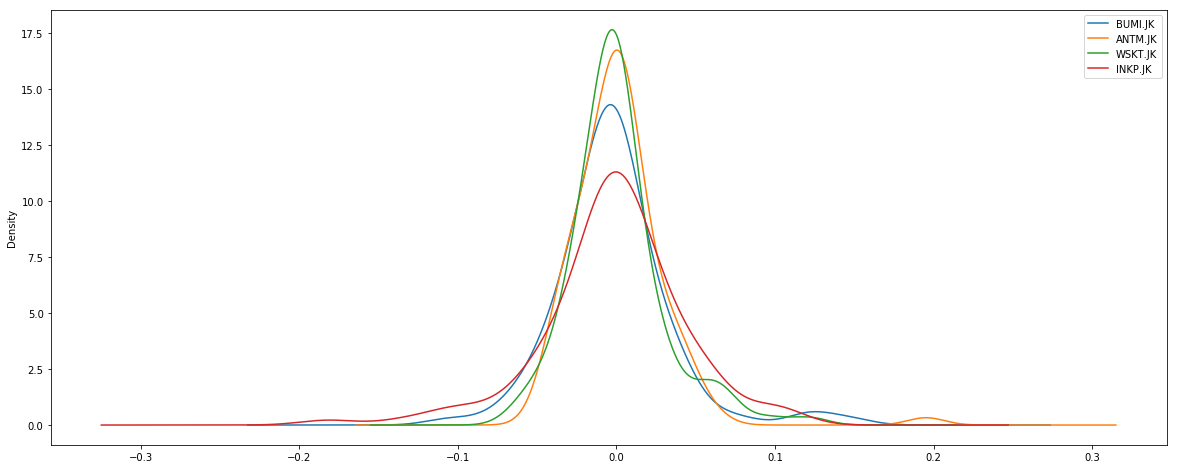

In [81]:
for stock in stocks:
    dailyReturnsDF[stock].plot(kind='kde' , figsize = (20,8), label =stock)

#dailyReturnsDF['INKP.JK'].plot(kind='kde' , figsize = (20,8), label ='INKP')


plt.legend()

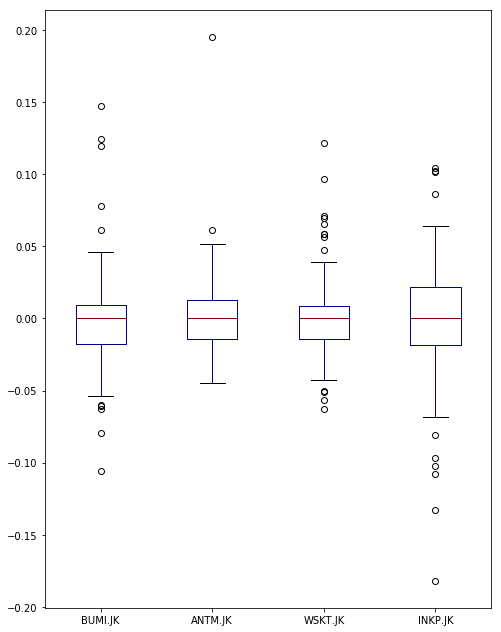

In [82]:
##BOX CHARTS
dailyReturnsDF.plot(kind='box',figsize=(8,11),colormap='jet')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fb967c240>,
      dtype=object)

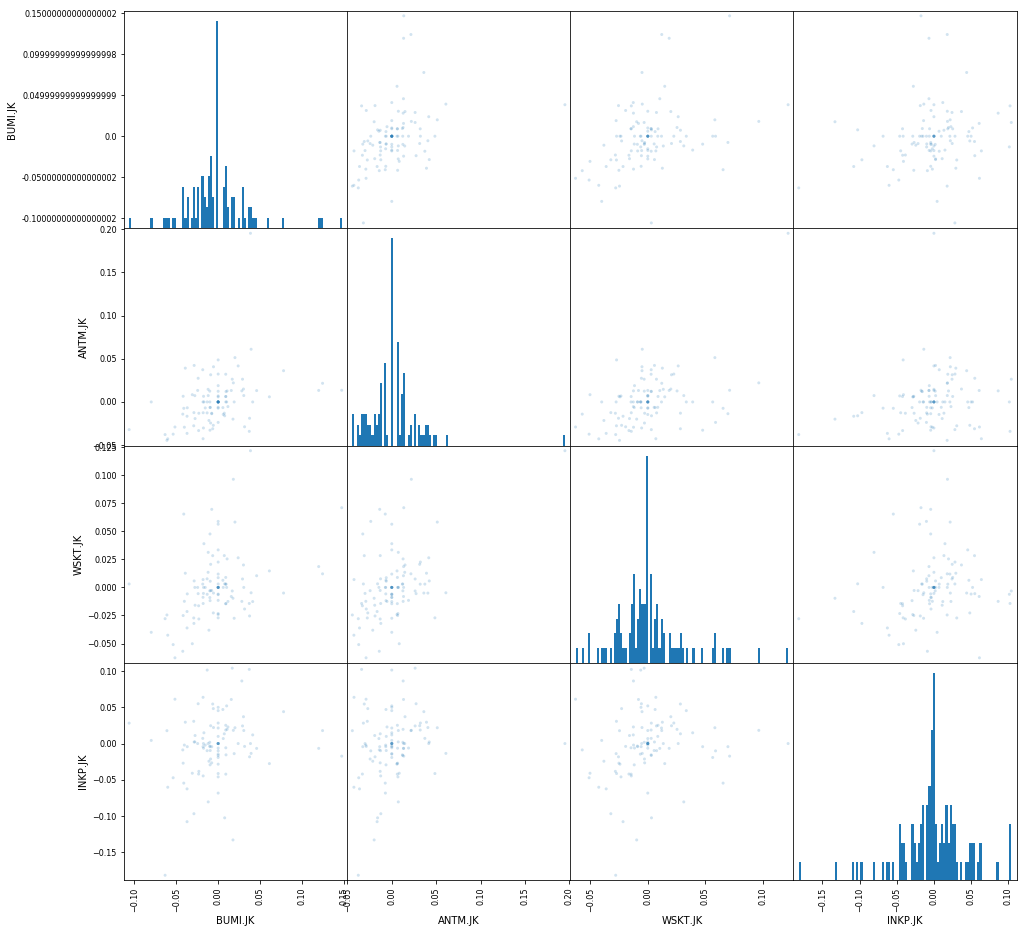

In [83]:
from pandas.plotting import scatter_matrix
scatter_matrix(dailyReturnsDF, figsize=(16,16), alpha = 0.2, hist_kwds={'bins':100})

## Cummulative returns

In [84]:
Cummulative = pd.DataFrame()

for stock in stocks:
    Cummulative[stock] = (1+dailyReturnsDF[stock]).cumprod() 



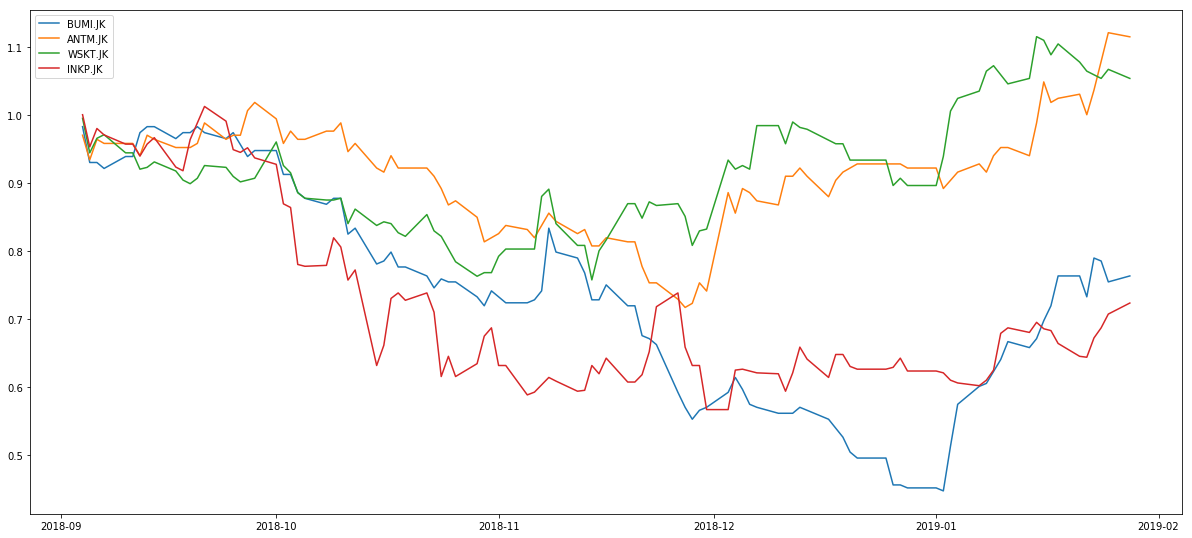

In [85]:
fig = plt.figure(figsize=(16,7))

ax = fig.add_axes([0,0,1,1])

for stock in stocks:
    ax.plot(Cummulative[stock], label =stock)


ax.legend(loc = 0 )

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose

# ETS (Error Trend Seasonal ) analysis 



In [87]:
result = seasonal_decompose(dailyReturnsDF['INKP.JK'][1:], model ='additive', freq=7)


In [88]:
volume = seasonal_decompose(volumesDF[stock], model='additive', freq=7)

<Figure size 1152x504 with 0 Axes>

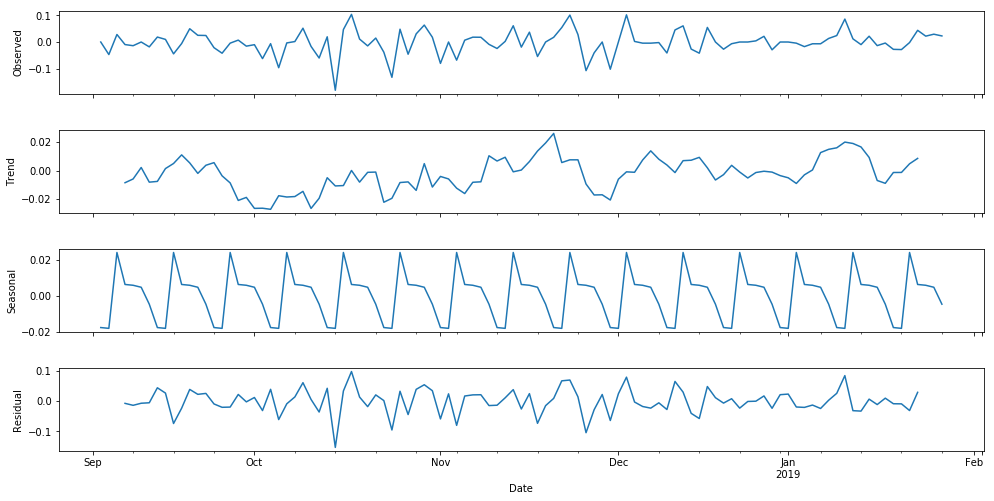

In [89]:
fig = plt.figure(figsize=(16,7))

fig = result.plot()
fig.set_size_inches(16,8)

<Figure size 1152x504 with 0 Axes>

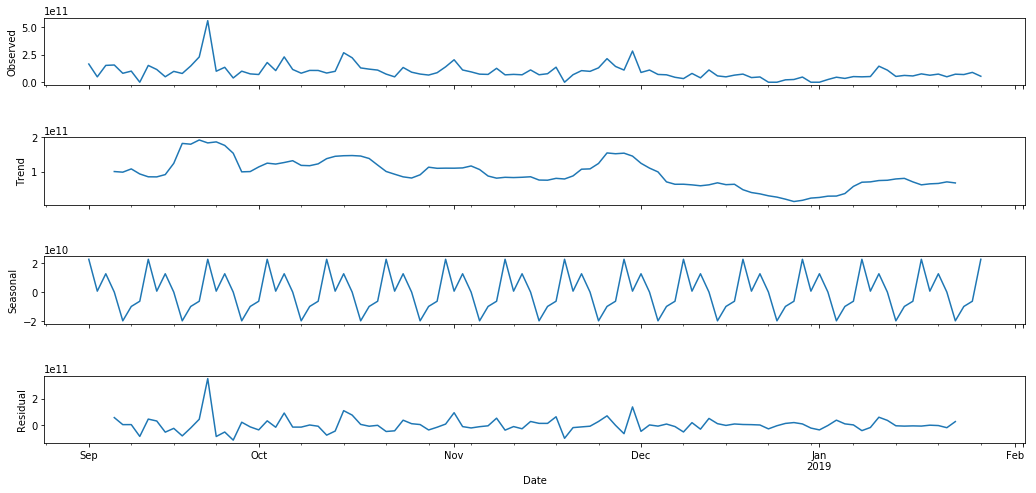

In [90]:
fig = plt.figure(figsize=(16,7))

fig = volume.plot()
fig.set_size_inches(16,8)

In [91]:
result.seasonal.describe()

count    1.050000e+02
mean     2.478176e-20
std      1.392352e-02
min     -1.822571e-02
25%     -1.777823e-02
50%      4.682735e-03
75%      6.237023e-03
max      2.405911e-02
Name: INKP.JK, dtype: float64

In [92]:
#nasdaq
result = seasonal_decompose(dailyReturnsDF['^IXIC'][1:], model ='additive', freq=7)
fig = plt.figure()


fig = result.plot()

fig.set_size_inches(16,8)

KeyError: '^IXIC'

In [ ]:
dailyReturnsDF['SQ'].describe()